In [35]:
import re
import pandas as pd
from datetime import datetime


In [36]:
import pandas as pd
import numpy as np
from datetime import datetime

# Open the text file
with open('/home/anon/Downloads/WhatsApp Chat with Management Concepts and Strategies.txt', 'r') as f:
    # Read the lines from the file
    lines = f.readlines()

# Function to extract information from each line
def extract_info(line):
    # Check for both 12-hour and 24-hour time formats
    date_formats = ['%d/%m/%y, %I:%M %p', '%d/%m/%y, %H:%M -']
    
    for date_format in date_formats:
        try:
            date_obj = datetime.strptime(line[:17], date_format)
            message = line[17:].strip()
            return date_obj, message
        except ValueError:
            continue

    # print(f"Error parsing date on line: {line}")
    return None

# Process lines and concatenate multi-line messages
processed_lines = []
current_date = None
current_message = ""
for line in lines:
    line = line.strip()
    if not line:
        continue  # Skip empty lines

    extracted_info = extract_info(line)
    if extracted_info:
        if current_message:
            processed_lines.append((current_date, current_message))
            current_message = ""
        current_date, current_message = extracted_info
    else:
        # Concatenate multi-line messages
        current_message += ' ' + line

# Process the last message if there is any
if current_message:
    processed_lines.append((current_date, current_message))

# Create a pandas DataFrame
df = pd.DataFrame(processed_lines, columns=['date', 'usermessage'])

# Convert the date column to the desired format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].dt.strftime('%d/%m/%y %I:%M %p')

# Remove leading hyphen from user messages
df['usermessage'] = df['usermessage'].str.lstrip('-')


df[['user', 'message']] = df['usermessage'].str.extract(r'([^:]+):?(.*)')

df.drop('usermessage', axis=1, inplace=True)
df.loc[df['message'] == '', 'message'] = df['user']
df.loc[df['message'] == df['user'], 'user'] = 'group-notification'
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y %I:%M %p')

# Create new columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%B')  # Full month name
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['am/pm'] = df['date'].dt.strftime('%p')
df['dayname']=df['date'].dt.day_name()

df['only_date']=df['date'].dt.date

# Drop the original 'date' column



df = df[~np.isnan(df['year'])]
df['year'] = df['year'].astype(int)
df


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
1,2022-12-12 13:01:00,group-notification,Rishi Raj MCA joined using this group's invit...,2022,December,12.0,13.0,1.0,PM,Monday,2022-12-12
2,2022-12-12 13:02:00,group-notification,Dheepan joined using this group's invite link,2022,December,12.0,13.0,2.0,PM,Monday,2022-12-12
3,2022-12-12 13:04:00,group-notification,Soubhagya joined using this group's invite link,2022,December,12.0,13.0,4.0,PM,Monday,2022-12-12
4,2022-12-12 13:06:00,group-notification,Raju MCA joined using this group's invite link,2022,December,12.0,13.0,6.0,PM,Monday,2022-12-12
5,2022-12-12 13:16:00,group-notification,Balan MCA joined using this group's invite link,2022,December,12.0,13.0,16.0,PM,Monday,2022-12-12
...,...,...,...,...,...,...,...,...,...,...,...
345,2024-01-04 14:28:00,Sritam MCA,Okay Ma'am,2024,January,4.0,14.0,28.0,PM,Thursday,2024-01-04
346,2024-01-04 14:31:00,Dr. G Krishnapriya,Mini Project - 100 Internal marks - 40 Extern...,2024,January,4.0,14.0,31.0,PM,Thursday,2024-01-04
347,2024-01-04 14:33:00,Dr. G Krishnapriya,Dont tell your guides that I shared this. If...,2024,January,4.0,14.0,33.0,PM,Thursday,2024-01-04
348,2024-01-04 14:34:00,Sritam MCA,Okay Ma'am,2024,January,4.0,14.0,34.0,PM,Thursday,2024-01-04


In [37]:
cf = df
keywords = ['added', 'left', 'security', 'changed', 'removed', 'deleted', 'group-notification']
cf = cf[~cf['user'].str.contains('|'.join(keywords))]

pd.DataFrame(round(cf['user'].value_counts()/len(cf)*100,2)).reset_index().info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   user    53 non-null     object 
 1   count   53 non-null     float64
dtypes: float64(1), object(1)
memory usage: 980.0+ bytes


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
1,2022-12-12 13:01:00,group-notification,Rishi Raj MCA joined using this group's invit...,2022,December,12.0,13.0,1.0,PM,Monday,2022-12-12
2,2022-12-12 13:02:00,group-notification,Dheepan joined using this group's invite link,2022,December,12.0,13.0,2.0,PM,Monday,2022-12-12
3,2022-12-12 13:04:00,group-notification,Soubhagya joined using this group's invite link,2022,December,12.0,13.0,4.0,PM,Monday,2022-12-12
4,2022-12-12 13:06:00,group-notification,Raju MCA joined using this group's invite link,2022,December,12.0,13.0,6.0,PM,Monday,2022-12-12
5,2022-12-12 13:16:00,group-notification,Balan MCA joined using this group's invite link,2022,December,12.0,13.0,16.0,PM,Monday,2022-12-12


In [38]:
cf=df
keywords = ['added', 'left', 'security', 'changed', 'removed', 'deleted', 'group-notification']
cf = cf[~cf['user'].str.contains('|'.join(keywords))]
cf = cf[~cf['message'].str.contains('<Media omitted>')]
f=open('stop_hinglish.txt','r')
stop_hinglish=f.read()
df

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
1,2022-12-12 13:01:00,group-notification,Rishi Raj MCA joined using this group's invit...,2022,December,12.0,13.0,1.0,PM,Monday,2022-12-12
2,2022-12-12 13:02:00,group-notification,Dheepan joined using this group's invite link,2022,December,12.0,13.0,2.0,PM,Monday,2022-12-12
3,2022-12-12 13:04:00,group-notification,Soubhagya joined using this group's invite link,2022,December,12.0,13.0,4.0,PM,Monday,2022-12-12
4,2022-12-12 13:06:00,group-notification,Raju MCA joined using this group's invite link,2022,December,12.0,13.0,6.0,PM,Monday,2022-12-12
5,2022-12-12 13:16:00,group-notification,Balan MCA joined using this group's invite link,2022,December,12.0,13.0,16.0,PM,Monday,2022-12-12
...,...,...,...,...,...,...,...,...,...,...,...
345,2024-01-04 14:28:00,Sritam MCA,Okay Ma'am,2024,January,4.0,14.0,28.0,PM,Thursday,2024-01-04
346,2024-01-04 14:31:00,Dr. G Krishnapriya,Mini Project - 100 Internal marks - 40 Extern...,2024,January,4.0,14.0,31.0,PM,Thursday,2024-01-04
347,2024-01-04 14:33:00,Dr. G Krishnapriya,Dont tell your guides that I shared this. If...,2024,January,4.0,14.0,33.0,PM,Thursday,2024-01-04
348,2024-01-04 14:34:00,Sritam MCA,Okay Ma'am,2024,January,4.0,14.0,34.0,PM,Thursday,2024-01-04


In [39]:
words=[]
for message in cf['message']:
    for word in message.lower().split():
        if word not in stop_hinglish:
            words.append(word)

In [40]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20)).reset_index().drop(columns=['index']).rename(columns={0:'words',1:'freq'})

,words,freq
0,ma'am,37
1,mam,28
2,link,19
3,pm,18
4,mca,17
5,joined,17
6,group's,17
7,invite,17
8,marks,15
9,mca:,11


In [41]:
df


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
1,2022-12-12 13:01:00,group-notification,Rishi Raj MCA joined using this group's invit...,2022,December,12.0,13.0,1.0,PM,Monday,2022-12-12
2,2022-12-12 13:02:00,group-notification,Dheepan joined using this group's invite link,2022,December,12.0,13.0,2.0,PM,Monday,2022-12-12
3,2022-12-12 13:04:00,group-notification,Soubhagya joined using this group's invite link,2022,December,12.0,13.0,4.0,PM,Monday,2022-12-12
4,2022-12-12 13:06:00,group-notification,Raju MCA joined using this group's invite link,2022,December,12.0,13.0,6.0,PM,Monday,2022-12-12
5,2022-12-12 13:16:00,group-notification,Balan MCA joined using this group's invite link,2022,December,12.0,13.0,16.0,PM,Monday,2022-12-12
...,...,...,...,...,...,...,...,...,...,...,...
345,2024-01-04 14:28:00,Sritam MCA,Okay Ma'am,2024,January,4.0,14.0,28.0,PM,Thursday,2024-01-04
346,2024-01-04 14:31:00,Dr. G Krishnapriya,Mini Project - 100 Internal marks - 40 Extern...,2024,January,4.0,14.0,31.0,PM,Thursday,2024-01-04
347,2024-01-04 14:33:00,Dr. G Krishnapriya,Dont tell your guides that I shared this. If...,2024,January,4.0,14.0,33.0,PM,Thursday,2024-01-04
348,2024-01-04 14:34:00,Sritam MCA,Okay Ma'am,2024,January,4.0,14.0,34.0,PM,Thursday,2024-01-04


In [42]:
import emoji
emojis=[]
for message in df["message"]:
    emojis.extend(emoji.emoji_list(message))


In [43]:

emojis = [entry['emoji'] for entry in emojis]

emojis

['✌️',
 '😇',
 '😎',
 '😊',
 '😇',
 '👏',
 '✨',
 '😇',
 '✨',
 '✌️',
 '😇',
 '💖',
 '❣️',
 '😊',
 '🙏',
 '✌️',
 '😇',
 '😎',
 '😊',
 '😎',
 '😀',
 '😊',
 '😎',
 '😎',
 '✨',
 '👍',
 '😊',
 '❣️',
 '❣️',
 '❣️',
 '❣️',
 '😊',
 '😊',
 '😊',
 '😅',
 '👏',
 '👍',
 '👏',
 '👌',
 '🎊',
 '✨',
 '🥳',
 '❤️',
 '🎊',
 '🎉',
 '🥰',
 '✨',
 '🎊',
 '🎉',
 '🎆',
 '😇',
 '🤗',
 '✨',
 '✨',
 '✨',
 '😎',
 '❤️',
 '😊',
 '☺️',
 '🎇',
 '❤️',
 '❤️',
 '✌️',
 '😇',
 '😊',
 '✨',
 '😊']

In [44]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis)))).reset_index().drop(columns=['index']).rename(columns={0:'emoji',1:'frequency'})
df

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
1,2022-12-12 13:01:00,group-notification,Rishi Raj MCA joined using this group's invit...,2022,December,12.0,13.0,1.0,PM,Monday,2022-12-12
2,2022-12-12 13:02:00,group-notification,Dheepan joined using this group's invite link,2022,December,12.0,13.0,2.0,PM,Monday,2022-12-12
3,2022-12-12 13:04:00,group-notification,Soubhagya joined using this group's invite link,2022,December,12.0,13.0,4.0,PM,Monday,2022-12-12
4,2022-12-12 13:06:00,group-notification,Raju MCA joined using this group's invite link,2022,December,12.0,13.0,6.0,PM,Monday,2022-12-12
5,2022-12-12 13:16:00,group-notification,Balan MCA joined using this group's invite link,2022,December,12.0,13.0,16.0,PM,Monday,2022-12-12
...,...,...,...,...,...,...,...,...,...,...,...
345,2024-01-04 14:28:00,Sritam MCA,Okay Ma'am,2024,January,4.0,14.0,28.0,PM,Thursday,2024-01-04
346,2024-01-04 14:31:00,Dr. G Krishnapriya,Mini Project - 100 Internal marks - 40 Extern...,2024,January,4.0,14.0,31.0,PM,Thursday,2024-01-04
347,2024-01-04 14:33:00,Dr. G Krishnapriya,Dont tell your guides that I shared this. If...,2024,January,4.0,14.0,33.0,PM,Thursday,2024-01-04
348,2024-01-04 14:34:00,Sritam MCA,Okay Ma'am,2024,January,4.0,14.0,34.0,PM,Thursday,2024-01-04


In [45]:
import calendar

def g(df):
    df['month_number'] = df['month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12,'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})
    return df

df = g(df.copy())
df


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number
1,2022-12-12 13:01:00,group-notification,Rishi Raj MCA joined using this group's invit...,2022,December,12.0,13.0,1.0,PM,Monday,2022-12-12,12
2,2022-12-12 13:02:00,group-notification,Dheepan joined using this group's invite link,2022,December,12.0,13.0,2.0,PM,Monday,2022-12-12,12
3,2022-12-12 13:04:00,group-notification,Soubhagya joined using this group's invite link,2022,December,12.0,13.0,4.0,PM,Monday,2022-12-12,12
4,2022-12-12 13:06:00,group-notification,Raju MCA joined using this group's invite link,2022,December,12.0,13.0,6.0,PM,Monday,2022-12-12,12
5,2022-12-12 13:16:00,group-notification,Balan MCA joined using this group's invite link,2022,December,12.0,13.0,16.0,PM,Monday,2022-12-12,12
...,...,...,...,...,...,...,...,...,...,...,...,...
345,2024-01-04 14:28:00,Sritam MCA,Okay Ma'am,2024,January,4.0,14.0,28.0,PM,Thursday,2024-01-04,1
346,2024-01-04 14:31:00,Dr. G Krishnapriya,Mini Project - 100 Internal marks - 40 Extern...,2024,January,4.0,14.0,31.0,PM,Thursday,2024-01-04,1
347,2024-01-04 14:33:00,Dr. G Krishnapriya,Dont tell your guides that I shared this. If...,2024,January,4.0,14.0,33.0,PM,Thursday,2024-01-04,1
348,2024-01-04 14:34:00,Sritam MCA,Okay Ma'am,2024,January,4.0,14.0,34.0,PM,Thursday,2024-01-04,1


In [46]:
timeline=df.groupby(['year','month_number','month']).count()['message'].reset_index()

In [47]:
time=[]
for i in range(len(timeline)):
    time.append(timeline['month'][i]+' - '+ str(timeline['year'][i]))

In [48]:
time

['December - 2022',
 'January - 2023',
 'February - 2023',
 'March - 2023',
 'April - 2023',
 'May - 2023',
 'June - 2023',
 'July - 2023',
 'August - 2023',
 'September - 2023',
 'October - 2023',
 'November - 2023',
 'December - 2023',
 'January - 2024']

In [49]:
timeline['time']=time
timeline

,year,month_number,month,message,time
0,2022,12,December,43,December - 2022
1,2023,1,January,10,January - 2023
2,2023,2,February,10,February - 2023
3,2023,3,March,16,March - 2023
4,2023,4,April,17,April - 2023
5,2023,5,May,14,May - 2023
6,2023,6,June,5,June - 2023
7,2023,7,July,61,July - 2023
8,2023,8,August,24,August - 2023
9,2023,9,September,30,September - 2023


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'December - 2022'),
  Text(1, 0, 'January - 2023'),
  Text(2, 0, 'February - 2023'),
  Text(3, 0, 'March - 2023'),
  Text(4, 0, 'April - 2023'),
  Text(5, 0, 'May - 2023'),
  Text(6, 0, 'June - 2023'),
  Text(7, 0, 'July - 2023'),
  Text(8, 0, 'August - 2023'),
  Text(9, 0, 'September - 2023'),
  Text(10, 0, 'October - 2023'),
  Text(11, 0, 'November - 2023'),
  Text(12, 0, 'December - 2023'),
  Text(13, 0, 'January - 2024')])

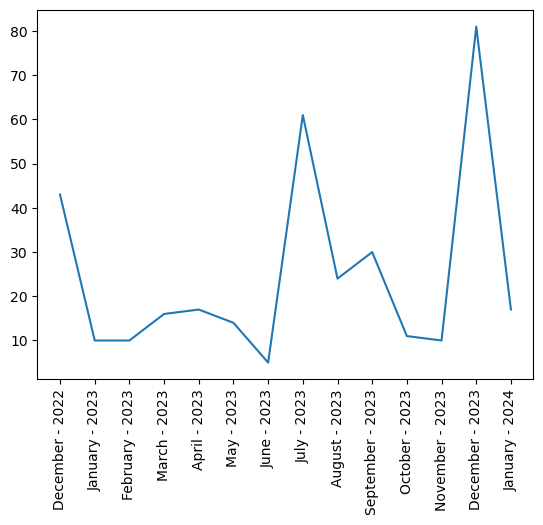

In [50]:
import matplotlib.pyplot as plt
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')

In [51]:
df.head()

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number
1,2022-12-12 13:01:00,group-notification,Rishi Raj MCA joined using this group's invit...,2022,December,12.0,13.0,1.0,PM,Monday,2022-12-12,12
2,2022-12-12 13:02:00,group-notification,Dheepan joined using this group's invite link,2022,December,12.0,13.0,2.0,PM,Monday,2022-12-12,12
3,2022-12-12 13:04:00,group-notification,Soubhagya joined using this group's invite link,2022,December,12.0,13.0,4.0,PM,Monday,2022-12-12,12
4,2022-12-12 13:06:00,group-notification,Raju MCA joined using this group's invite link,2022,December,12.0,13.0,6.0,PM,Monday,2022-12-12,12
5,2022-12-12 13:16:00,group-notification,Balan MCA joined using this group's invite link,2022,December,12.0,13.0,16.0,PM,Monday,2022-12-12,12


In [52]:
df['dayname']=df['date'].dt.day_name()

df['only_date']=df['date'].dt.date
df

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number
1,2022-12-12 13:01:00,group-notification,Rishi Raj MCA joined using this group's invit...,2022,December,12.0,13.0,1.0,PM,Monday,2022-12-12,12
2,2022-12-12 13:02:00,group-notification,Dheepan joined using this group's invite link,2022,December,12.0,13.0,2.0,PM,Monday,2022-12-12,12
3,2022-12-12 13:04:00,group-notification,Soubhagya joined using this group's invite link,2022,December,12.0,13.0,4.0,PM,Monday,2022-12-12,12
4,2022-12-12 13:06:00,group-notification,Raju MCA joined using this group's invite link,2022,December,12.0,13.0,6.0,PM,Monday,2022-12-12,12
5,2022-12-12 13:16:00,group-notification,Balan MCA joined using this group's invite link,2022,December,12.0,13.0,16.0,PM,Monday,2022-12-12,12
...,...,...,...,...,...,...,...,...,...,...,...,...
345,2024-01-04 14:28:00,Sritam MCA,Okay Ma'am,2024,January,4.0,14.0,28.0,PM,Thursday,2024-01-04,1
346,2024-01-04 14:31:00,Dr. G Krishnapriya,Mini Project - 100 Internal marks - 40 Extern...,2024,January,4.0,14.0,31.0,PM,Thursday,2024-01-04,1
347,2024-01-04 14:33:00,Dr. G Krishnapriya,Dont tell your guides that I shared this. If...,2024,January,4.0,14.0,33.0,PM,Thursday,2024-01-04,1
348,2024-01-04 14:34:00,Sritam MCA,Okay Ma'am,2024,January,4.0,14.0,34.0,PM,Thursday,2024-01-04,1


In [53]:
df.groupby('only_date').count()['message'].reset_index()

,only_date,message
0,2022-12-12,16
1,2022-12-13,2
2,2022-12-15,2
3,2022-12-17,4
4,2022-12-18,5
...,...,...
88,2023-12-19,3
89,2023-12-20,39
90,2023-12-22,8
91,2024-01-02,2


In [54]:
df['dayname'].value_counts().reset_index().rename(columns={'count':'message'})

,dayname,message
0,Friday,69
1,Monday,68
2,Thursday,64
3,Wednesday,59
4,Sunday,37
5,Tuesday,27
6,Saturday,25


In [55]:
df['month'].value_counts().reset_index().rename(columns={'count':'message'})

,month,message
0,December,124
1,July,61
2,September,30
3,January,27
4,August,24
5,April,17
6,March,16
7,May,14
8,October,11
9,February,10


In [70]:
def get_time_period(hour):
    if 0<=hour<1:
        return "12AM - 1AM"
    elif 1<= hour <11:
        return f'{hour}AM - {hour+1}AM'
    elif hour == 11:
        return '11AM - 12PM'
    elif hour == 12:
        return '12PM - 1PM'
    elif hour == 23:
        return f'{hour-12}PM - 12AM'
    elif 12 < hour <23:
        return f'{hour-12}PM - {hour-11}PM'
        
    
df['period'] = df['hour'].apply(get_time_period)
df['period'].unique()


array(['1.0PM - 2.0PM', '2.0PM - 3.0PM', '4.0PM - 5.0PM', '5.0PM - 6.0PM',
       '6.0PM - 7.0PM', '7.0PM - 8.0PM', '9.0PM - 10.0PM',
       '8.0AM - 9.0AM', '9.0AM - 10.0AM', '8.0PM - 9.0PM',
       '7.0AM - 8.0AM', '3.0PM - 4.0PM', '6.0AM - 7.0AM', '5.0AM - 6.0AM',
       '1.0AM - 2.0AM', '2.0AM - 3.0AM'], dtype=object)

In [94]:
def get_time_period(hour):
    if 0 <= hour < 1:
        return '12AM - 1AM'
    elif 1 <= hour < 12:
        return f'{int(hour)}AM - {int(hour+1)}AM'
    elif hour == 12:
        return '12PM - 1PM'
    else:
        return f'{str(hour-12)[:-2]}PM - {int(hour-11)}PM'
df['period'] = df['hour'].apply(get_time_period)
heat_map=df[['period', 'dayname']].value_counts().reset_index().rename(columns={'count': 'message'})
df.head()


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period,sentiment,sentiment_category
1,2022-12-12 13:01:00,group-notification,Rishi Raj MCA joined using this group's invit...,2022,December,12.0,13.0,1.0,PM,Monday,2022-12-12,12,1PM - 2PM,0.0,neutral
2,2022-12-12 13:02:00,group-notification,Dheepan joined using this group's invite link,2022,December,12.0,13.0,2.0,PM,Monday,2022-12-12,12,1PM - 2PM,0.0,neutral
3,2022-12-12 13:04:00,group-notification,Soubhagya joined using this group's invite link,2022,December,12.0,13.0,4.0,PM,Monday,2022-12-12,12,1PM - 2PM,0.0,neutral
4,2022-12-12 13:06:00,group-notification,Raju MCA joined using this group's invite link,2022,December,12.0,13.0,6.0,PM,Monday,2022-12-12,12,1PM - 2PM,0.0,neutral
5,2022-12-12 13:16:00,group-notification,Balan MCA joined using this group's invite link,2022,December,12.0,13.0,16.0,PM,Monday,2022-12-12,12,1PM - 2PM,0.0,neutral


In [91]:
period=df['period'].unique()
period.sort()
print(period)

['1AM - 2AM' '1PM - 2PM' '2AM - 3AM' '2PM - 3PM' '3PM - 4PM' '4PM - 5PM'
 '5AM - 6AM' '5PM - 6PM' '6AM - 7AM' '6PM - 7PM' '7AM - 8AM' '7PM - 8PM'
 '8AM - 9AM' '8PM - 9PM' '9AM - 10AM' '9PM - 10PM']


In [78]:
df.head()

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period,sentiment,sentiment_category
1,2022-12-12 13:01:00,group-notification,Rishi Raj MCA joined using this group's invit...,2022,December,12.0,13.0,1.0,PM,Monday,2022-12-12,12,NaN,0.0,neutral
2,2022-12-12 13:02:00,group-notification,Dheepan joined using this group's invite link,2022,December,12.0,13.0,2.0,PM,Monday,2022-12-12,12,NaN,0.0,neutral
3,2022-12-12 13:04:00,group-notification,Soubhagya joined using this group's invite link,2022,December,12.0,13.0,4.0,PM,Monday,2022-12-12,12,NaN,0.0,neutral
4,2022-12-12 13:06:00,group-notification,Raju MCA joined using this group's invite link,2022,December,12.0,13.0,6.0,PM,Monday,2022-12-12,12,NaN,0.0,neutral
5,2022-12-12 13:16:00,group-notification,Balan MCA joined using this group's invite link,2022,December,12.0,13.0,16.0,PM,Monday,2022-12-12,12,NaN,0.0,neutral


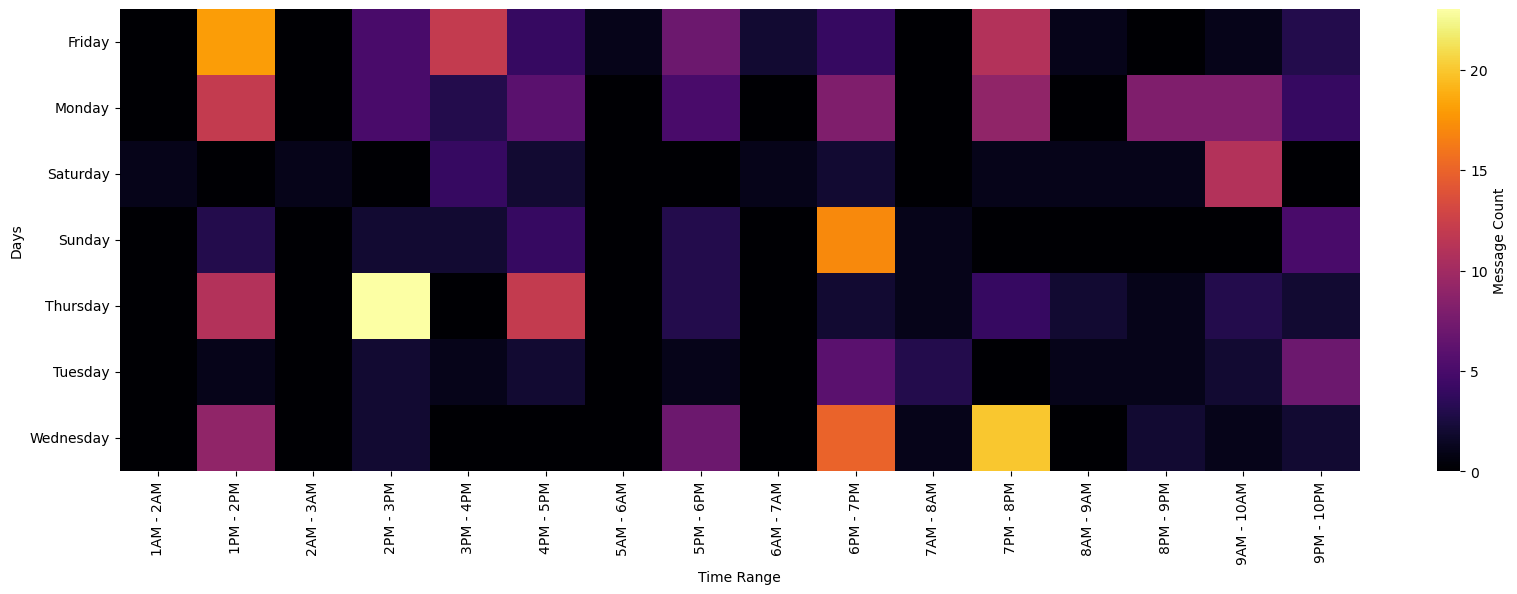

In [92]:
import seaborn as sns

df['period'] = pd.Categorical(df['period'], categories=period, ordered=True)
df.head()
plt.figure(figsize=(20,6))
heatmap_data = df.pivot_table(index='dayname', columns='period', values='message', aggfunc='count').fillna(0)
sns.heatmap(heatmap_data, cmap='inferno', cbar_kws={'label': 'Message Count'})
plt.xlabel('Time Range')
plt.ylabel('Days')
plt.show()

In [60]:
df.pivot_table(index='dayname', columns='period', values='message', aggfunc='count').fillna(0)

period,12AM - 1AM,1AM - 2AM,2AM - 3AM,3AM - 4AM,4AM - 5AM,5AM - 6AM,6AM - 7AM,7AM - 8AM,8AM - 9AM,9AM - 10AM,...,2PM - 3PM,3PM - 4PM,4PM - 5PM,5PM - 6PM,6PM - 7PM,7PM - 8PM,8PM - 9PM,9PM - 10PM,10PM - 11PM,11PM - 12AM
dayname,,,,,,,,,,,,,,,,,,,,,
Friday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Monday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Saturday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sunday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thursday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tuesday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wednesday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.head()

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period
1,2022-12-12 13:01:00,group-notification,Rishi Raj MCA joined using this group's invit...,2022,December,12.0,13.0,1.0,PM,Monday,2022-12-12,12,NaN
2,2022-12-12 13:02:00,group-notification,Dheepan joined using this group's invite link,2022,December,12.0,13.0,2.0,PM,Monday,2022-12-12,12,NaN
3,2022-12-12 13:04:00,group-notification,Soubhagya joined using this group's invite link,2022,December,12.0,13.0,4.0,PM,Monday,2022-12-12,12,NaN
4,2022-12-12 13:06:00,group-notification,Raju MCA joined using this group's invite link,2022,December,12.0,13.0,6.0,PM,Monday,2022-12-12,12,NaN
5,2022-12-12 13:16:00,group-notification,Balan MCA joined using this group's invite link,2022,December,12.0,13.0,16.0,PM,Monday,2022-12-12,12,NaN


In [62]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [63]:
from textblob import TextBlob


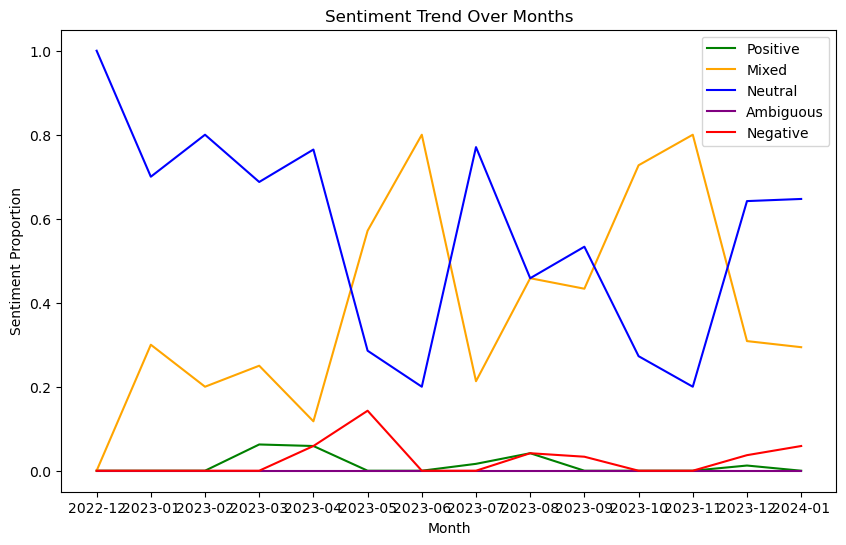

In [64]:
df['date'] = pd.to_datetime(df['date'])

# Define a function to get sentiment polarity
def get_sentiment_polarity(message):
    analysis = TextBlob(message)
    return analysis.sentiment.polarity

# Apply sentiment analysis to each message
df['sentiment'] = df['message'].apply(get_sentiment_polarity)

# Create a new column for sentiment categories based on polarity
df['sentiment_category'] = pd.cut(df['sentiment'], bins=[-1, -0.1, 0.1, 0.5, 1], 
                                  labels=['negative', 'neutral', 'mixed', 'positive'])

# Introduce 'ambiguous' category for sentiment close to 0
df['sentiment_category'] = df['sentiment_category'].cat.add_categories(['ambiguous'])
df['sentiment_category'].fillna('ambiguous', inplace=True)

# Group by month and calculate the average sentiment for each month
monthly_sentiment = df.groupby(df['date'].dt.to_period("M"))['sentiment_category'].value_counts(normalize=True).unstack().fillna(0)

# Convert PeriodIndex to string for plotting
monthly_sentiment.index = monthly_sentiment.index.astype(str)

# Plot sentiments with different colors
fig, ax = plt.subplots(figsize=(10, 6))

# Plot positive sentiment as a green line
ax.plot(monthly_sentiment.index, monthly_sentiment['positive'], color='green', label='Positive')

# Plot mixed sentiment as an orange line
ax.plot(monthly_sentiment.index, monthly_sentiment['mixed'], color='orange', label='Mixed')

# Plot neutral sentiment as a blue line
ax.plot(monthly_sentiment.index, monthly_sentiment['neutral'], color='blue', label='Neutral')

# Plot ambiguous sentiment as a purple line
ax.plot(monthly_sentiment.index, monthly_sentiment['ambiguous'], color='purple', label='Ambiguous')

# Plot negative sentiment as a red line
ax.plot(monthly_sentiment.index, monthly_sentiment['negative'], color='red', label='Negative')

# Add legend
ax.legend()

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Proportion')
ax.set_title('Sentiment Trend Over Months')

# Show the plot
plt.show()
